Well well well. You are here. At my first solo project created by myself from scratch. This will have some... playful aspects (hopefully) and I guess a little insight of my inner thoughts. No filters. This is me. Enjoy :-)

# The Great Beginning

## Somaan's Personal Expense Dashboard

This notebook houses all the code cells needed to load or create views of provided csv files for planned and actual spend.
If it works as expected, we shall get some colourful pie charts depicting the spends of each planned and actual spends with categories as well as a third showing the difference. That third one will need extra thought to think about whether a pie chart is the best way to show that. Maybe a two-way bar chart. All in the journey of a new data scientist!

### Setup
Before beginning, a few things need to be checked.

1. Folder this notebook is saved in. Move this notebook and open it in the directory you would like this notebook and any files or folders generated by this notebook to be saved in. 
2. The csv files for actual spend and planned spend are also in this folder.
3. The names for the csv files are consistent with that in step 2. Feel free to scroll down to step two and change the file name so that they are consistent with your own naming convention.
4. Change the folder name you would like to save below in the code cell.

Run the code cell below to set up the notebook. Remember to change the month.

In [35]:
import pandas as pd
import numpy as np
import os

folder_name = "March_figures"  # Change this to the relevant month
#Change the month_figures below to the relevant month
os.makedirs(folder_name, exist_ok=True)

## Remaining Steps.

The rest of the steps will take place in the following order.

- Step 2: Load csv files

- Step 3: Analyse Your Spending

- Step 4: Visualise Spending

- Step 5: Re-evaluate and find an improvement.

### Step 2: Load csv files

The csv files in the github repository are named 'planned_spend_march.csv' and 'actual_spend_march.csv'. Both of these files will be loaded. 
It is good practice to check both files once loaded to see if the column headers match and you can make sense of them.


In [36]:
planned_spend = pd.read_csv('planned_spend_march.csv')
actual_spend = pd.read_csv('actual_spend_march.csv')


planned_spend.set_index('item_name', inplace=True)
actual_spend.set_index('item_name', inplace=True)
# Display the first few rows of each DataFrame to check the structure and headers
print("Planned Spend DataFrame:")
print(planned_spend.tail())

print("\nActual Spend DataFrame:")
print(actual_spend.tail())



Planned Spend DataFrame:
               amount_GBP  item_category            item_group
item_name                                                     
Zakaat             340.00   Fundamentals               Charity
Vacation Fund      360.00        Future          Entertainment
Sadia               50.00  Miscellaneous                 Gifts
Misc               100.00  Miscellaneous  Groceries + whatever
Total             2495.59            NaN                   NaN

Actual Spend DataFrame:
               amount_GBP  item_category            item_group
item_name                                                     
Vacation Fund      120.00        Future          Entertainment
Sadia               50.00  Miscellaneous                 Gifts
Misc                56.13  Miscellaneous  Groceries + whatever
Headphones          26.09            Fun         Entertainment
Total             2516.98            NaN                   NaN


### Playground
Feel free to use the code cell below to play around with the dataframes. Do what you want. Go crazy!!!! ;-P

### STEP 3: Analysis of Spending.

This section will reveal general statistics of the data and over time can reveal trends such as regular over spending in a certain category. The first two code cells simply use the describe method on the grouped planned and actual spends by item group.

#### Summary of statistics
The total actual spend was about £20 higher than the planned amount. The categories in which the mean spend was higher than planned are fundamentals and fun, while the mean spend for future and miscellaneous was lower.

In [37]:
actual_total = actual_spend.loc["Total", "amount_GBP"]
print(f"\nActual total spend: £ {actual_total}")

planned_total = planned_spend.loc["Total", "amount_GBP"]
print(f"Planned total spend: £ {planned_total}")

total_difference = actual_total - planned_total
print(f"Total difference: £ {total_difference:.2f}")

if actual_total < planned_total:
    print("You spent less than planned.")
elif actual_total > planned_total:
    print("You spent more than planned.")
else:
    print("You spent exactly as planned.")


Actual total spend: £ 2516.98
Planned total spend: £ 2495.59
Total difference: £ 21.39
You spent more than planned.


In [38]:
# Group and sum by category
planned_by_category = planned_spend.groupby("item_category")["amount_GBP"].sum()
actual_by_category = actual_spend.groupby("item_category")["amount_GBP"].sum()

# Build comparison DataFrame with all columns including an additional column for difference and percentage difference
comparison = pd.DataFrame({
    "Planned": planned_by_category,
    "Actual": actual_by_category,
    "Difference": actual_by_category - planned_by_category,
    "% Difference": ((actual_by_category - planned_by_category) / planned_by_category) * 100
}).round(2)

# Display result
print(comparison)

               Planned   Actual  Difference  % Difference
item_category                                            
Fun              68.97   175.63      106.66        154.65
Fundamentals   1761.40  1893.61      132.21          7.51
Future          515.22   341.61     -173.61        -33.70
Miscellaneous   150.00   106.13      -43.87        -29.25


### Step 4: Visualise Spending

Using matplotlib, we can create a bar chart to see the actual vs planned spend and the %difference. We can also create a pie chart for a breakdown of each category. Remember to change the code below for the relevant month.

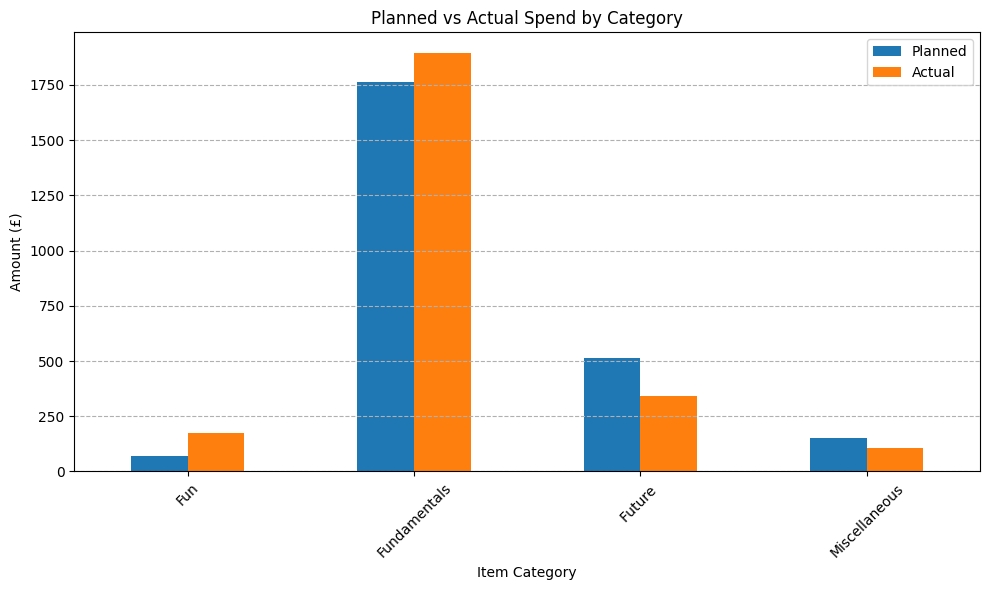

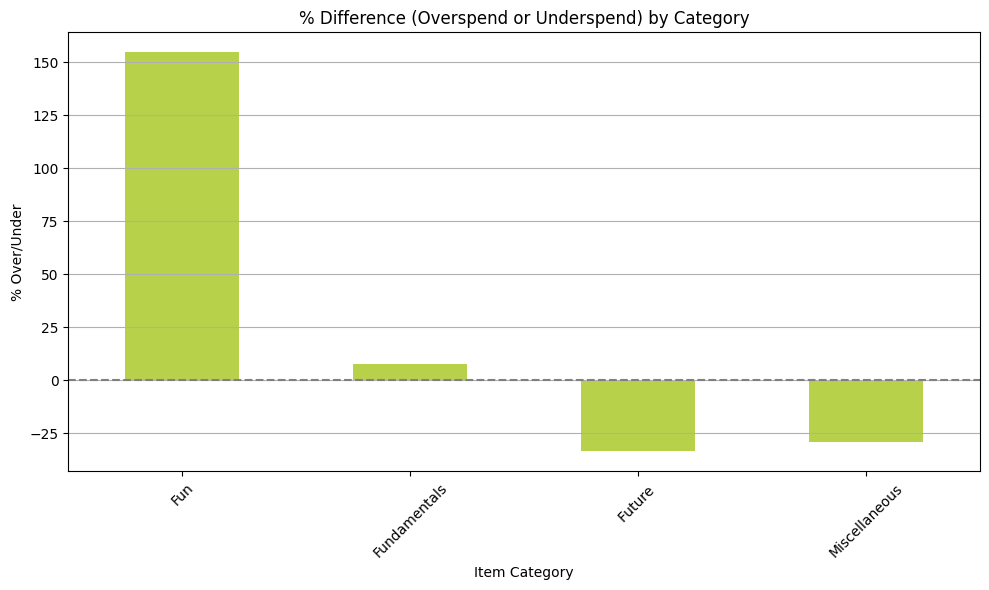

In [39]:
import matplotlib.pyplot as plt

# --- Bar chart: Planned vs Actual spend ---
comparison[["Planned", "Actual"]].plot(
    kind='bar',
    figsize=(10, 6),
    title='Planned vs Actual Spend by Category',
    ylabel='Amount (£)',
    xlabel='Item Category',
    rot=45,
    color=['#1f77b4','#ff7f0e']
)
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.legend()

# Change the Month_figures below to the relevant month
plt.savefig(f"{folder_name}/planned_vs_Actual_by_category.png")
plt.show()

# --- Bar chart: % Difference ---
comparison["% Difference"].plot(
    kind='bar',
    figsize=(10, 6),
    title='% Difference (Overspend or Underspend) by Category',
    ylabel='% Over/Under',
    xlabel='Item Category',
    color="#b8d14a",
    rot=45
)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.grid(axis='y')
# Change the Month_figures below to the relevant month
plt.savefig(f"{folder_name}/bar_category_comparison_%.png")
plt.show()

We can also add a pie chart for each category so we can see the distribution of money within each item group in each category.

#### Reminder: Change the code to save the figure to the relevant folder for the relevant month

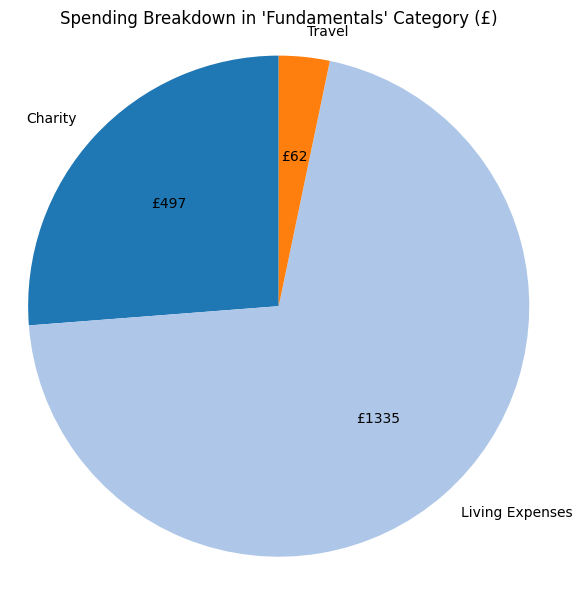

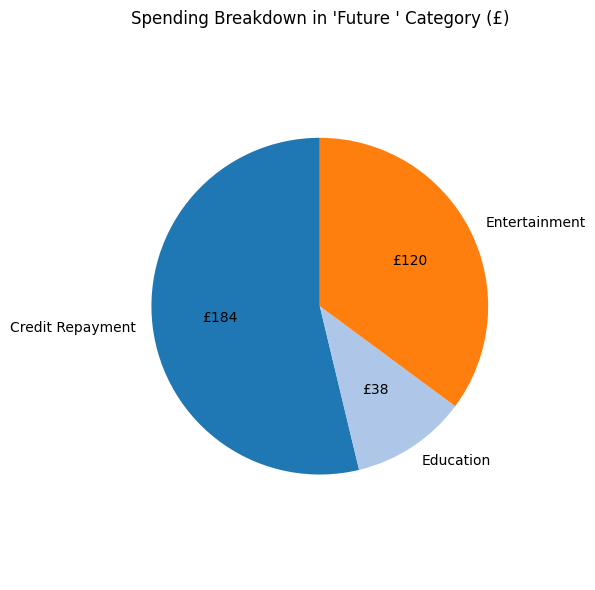

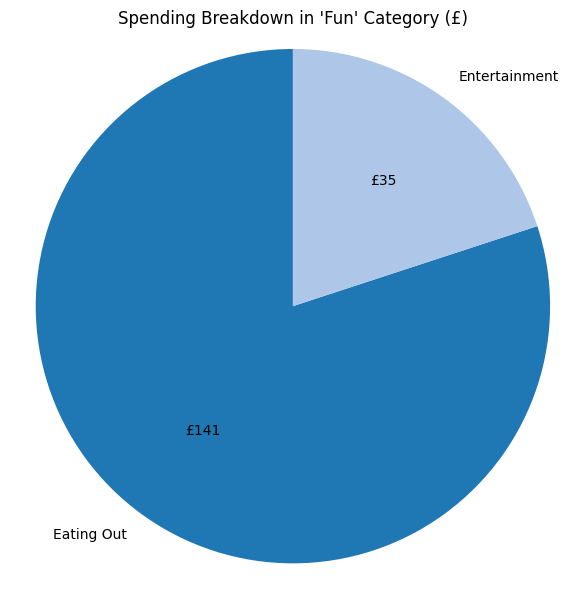

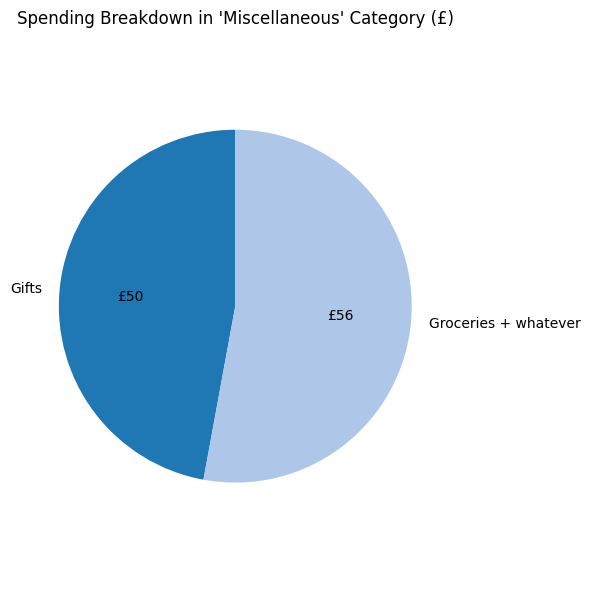

In [40]:
# Custom function to show £ values instead of %
def format_pound_labels(pct, allvals):
    absolute = int(round(pct / 100. * sum(allvals)))
    return f"£{absolute}"

# Loop through each category and generate a pie chart with £ labels
for category in actual_spend["item_category"].dropna().unique():
    category_data = actual_spend[actual_spend["item_category"] == category]
    group_totals = category_data.groupby("item_group")["amount_GBP"].sum()

    plt.figure(figsize=(6, 6))
    plt.pie(
        group_totals,
        labels=group_totals.index,
        # passing lambda pct: format_pound_labels(pct, group_totals) to autopct as an in-line function.
        # autopct usually accepts a string format or a function that formats the percentage. 
        # This time the function is used to format the labels as pounds.
        autopct=lambda pct: format_pound_labels(pct, group_totals),
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"Spending Breakdown in '{category}' Category (£)")
    plt.axis('equal')
    plt.tight_layout()

    # Save the pie chart to the Month_figures folder
    plt.savefig(f"{folder_name}/pie_{category.strip().replace(' ', '_')}.png")
    plt.show()

When making the pie charts, I decided against using a simple percentage figure. That's simply because we can visually see in a pie chart and make a rough estimate as to the percentage usage of money allocated to each category. What matters most is the actual value, so a custom function had to be created to change what the pie chart shows, instead of autopct.

### Step 5: Re-evaluate and find an improvement.

I think the project went well mostly. It was tough to figure out some parts as I've not seen them before. For me this was when using autopct to try and get it to show a £ value rather than %. I had to google it instead and create an in-line function to use instead.

Anyway, what I realised is I haven't saved any of the figures. The whole point of this project was to be able to see month by month where the spending was high or low for each category. Running the notebook multiple times changing the name for each month is tedious and obviously saving the bar charts and pie charts would save a lot of time. So... let's do that.

The first block in the code cell below is added to the start of this notebook to create a folder to save the figures in. The following blocks are added to previous code to add this saving functionality. Of course the March should be changed to the relevant month so it's important at the start of the notebook, before running anything to change the folder_name variable

An additional improvement for next time would perhaps be to change the folder name without having to manually type them.

In [41]:
# import os
# folder_name = "March_figures"  # Change this to the relevant month
# os.makedirs(folder_name, exist_ok=True)

#For bar charts
#plt.savefig(f"{folder_name}/planned_vs_Actual_by_category.png")

#For pie charts
#plt.savefig(f"{folder_name}/pie_{category.strip().replace(' ', '_')}.png")